In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
     

In [187]:
#  HERE  SAMPLES = 500 , TOTAL 3 CENTERS AND CLUSTER FORMES 4 
X, y_true = make_blobs(n_samples=900, centers=3, cluster_std=4, random_state=42)

In [188]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,1.292498,6.706672
1,0.946946,-3.433569
2,-4.346641,5.614909
3,-4.866657,12.412695
4,-10.778966,8.657806
...,...,...
895,-5.534601,3.325271
896,10.168515,4.568009
897,0.833571,4.495459
898,0.235843,2.563423


In [189]:
#  BEFORE WE WANT TO SCALE THE DATA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [190]:
inertia = []
#  THIS RANGE DECIDE HOW MANY POINTS WE HAVE TO PUT 
K_range = range(1,11)

In [191]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [192]:
inertia

[1800.0000000000011,
 923.2986270672134,
 524.5884584813338,
 444.83027148432535,
 387.4125592080369,
 317.6124107115265,
 285.1544656564824,
 244.49467157767492,
 218.8193447866415,
 192.2756485803387]

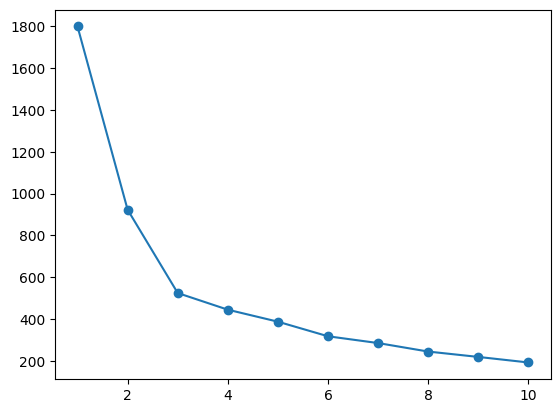

In [193]:


plt.plot(K_range, inertia, marker='o')

In [194]:
_
kmeans_final = KMeans(n_clusters=3, random_state=42)


In [195]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [196]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

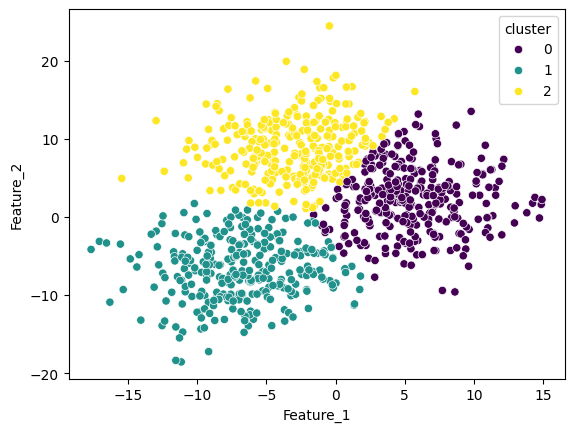

In [197]:


sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [198]:
from sklearn.datasets import make_moons



In [199]:


X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [200]:
from sklearn.cluster import KMeans, DBSCAN

In [201]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [202]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
     

In [203]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [204]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

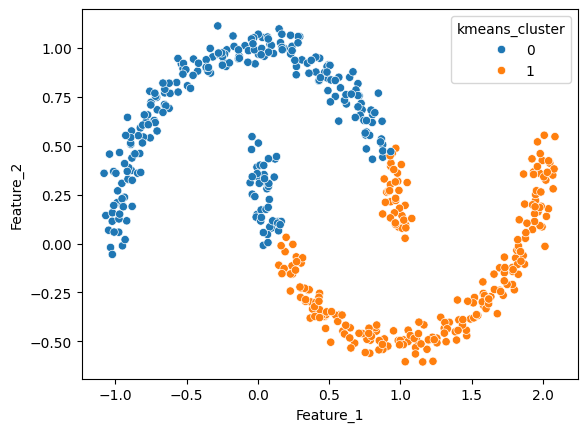

In [205]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')


In [206]:

#  HERE WE GIVE EPSILON MEANS DISTANCE FROM POINT 1 TO 2 
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [207]:


df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

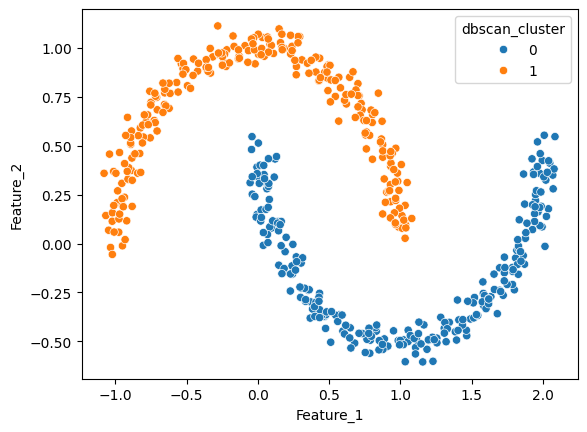

In [208]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')
